In [1]:
'''             IMPORTING LIBRARIES                    '''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
###### LOADING DATASET
df = pd.read_csv('/content/drive/MyDrive/datasets/AIDS_Classification_50000.csv')
print(df.shape)

(50000, 23)


In [3]:
# DataSet Analysis

print(df.columns)
print(df.describe())
df.info()

Index(['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'preanti', 'race', 'gender', 'str2', 'strat',
       'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820',
       'infected'],
      dtype='object')
               time           trt           age          wtkg          hemo  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean     877.369780      1.384800     34.164020     75.861991      0.033480   
std      307.288688      1.233272      7.091152     12.028730      0.179888   
min       66.000000      0.000000     12.000000     42.361620      0.000000   
25%      542.000000      0.000000     29.000000     68.253682      0.000000   
50%     1045.000000      1.000000     34.000000     74.054115      0.000000   
75%     1136.000000      3.000000     39.000000     81.142185      0.000000   
max     1231.000000      3.000000     68.000000    149.830870      1.000000   

               homo         drugs

time   trt    age    wtkg   hemo   homo   drugs  karnof  oprior  z30    preanti  race   gender  str2   strat  symptom  treat  offtrt  cd40   cd420  cd80   cd820  infected
False  False  False  False  False  False  False  False   False   False  False    False  False   False  False  False    False  False   False  False  False  False  False       50000
Name: count, dtype: int64
21
(50000,)


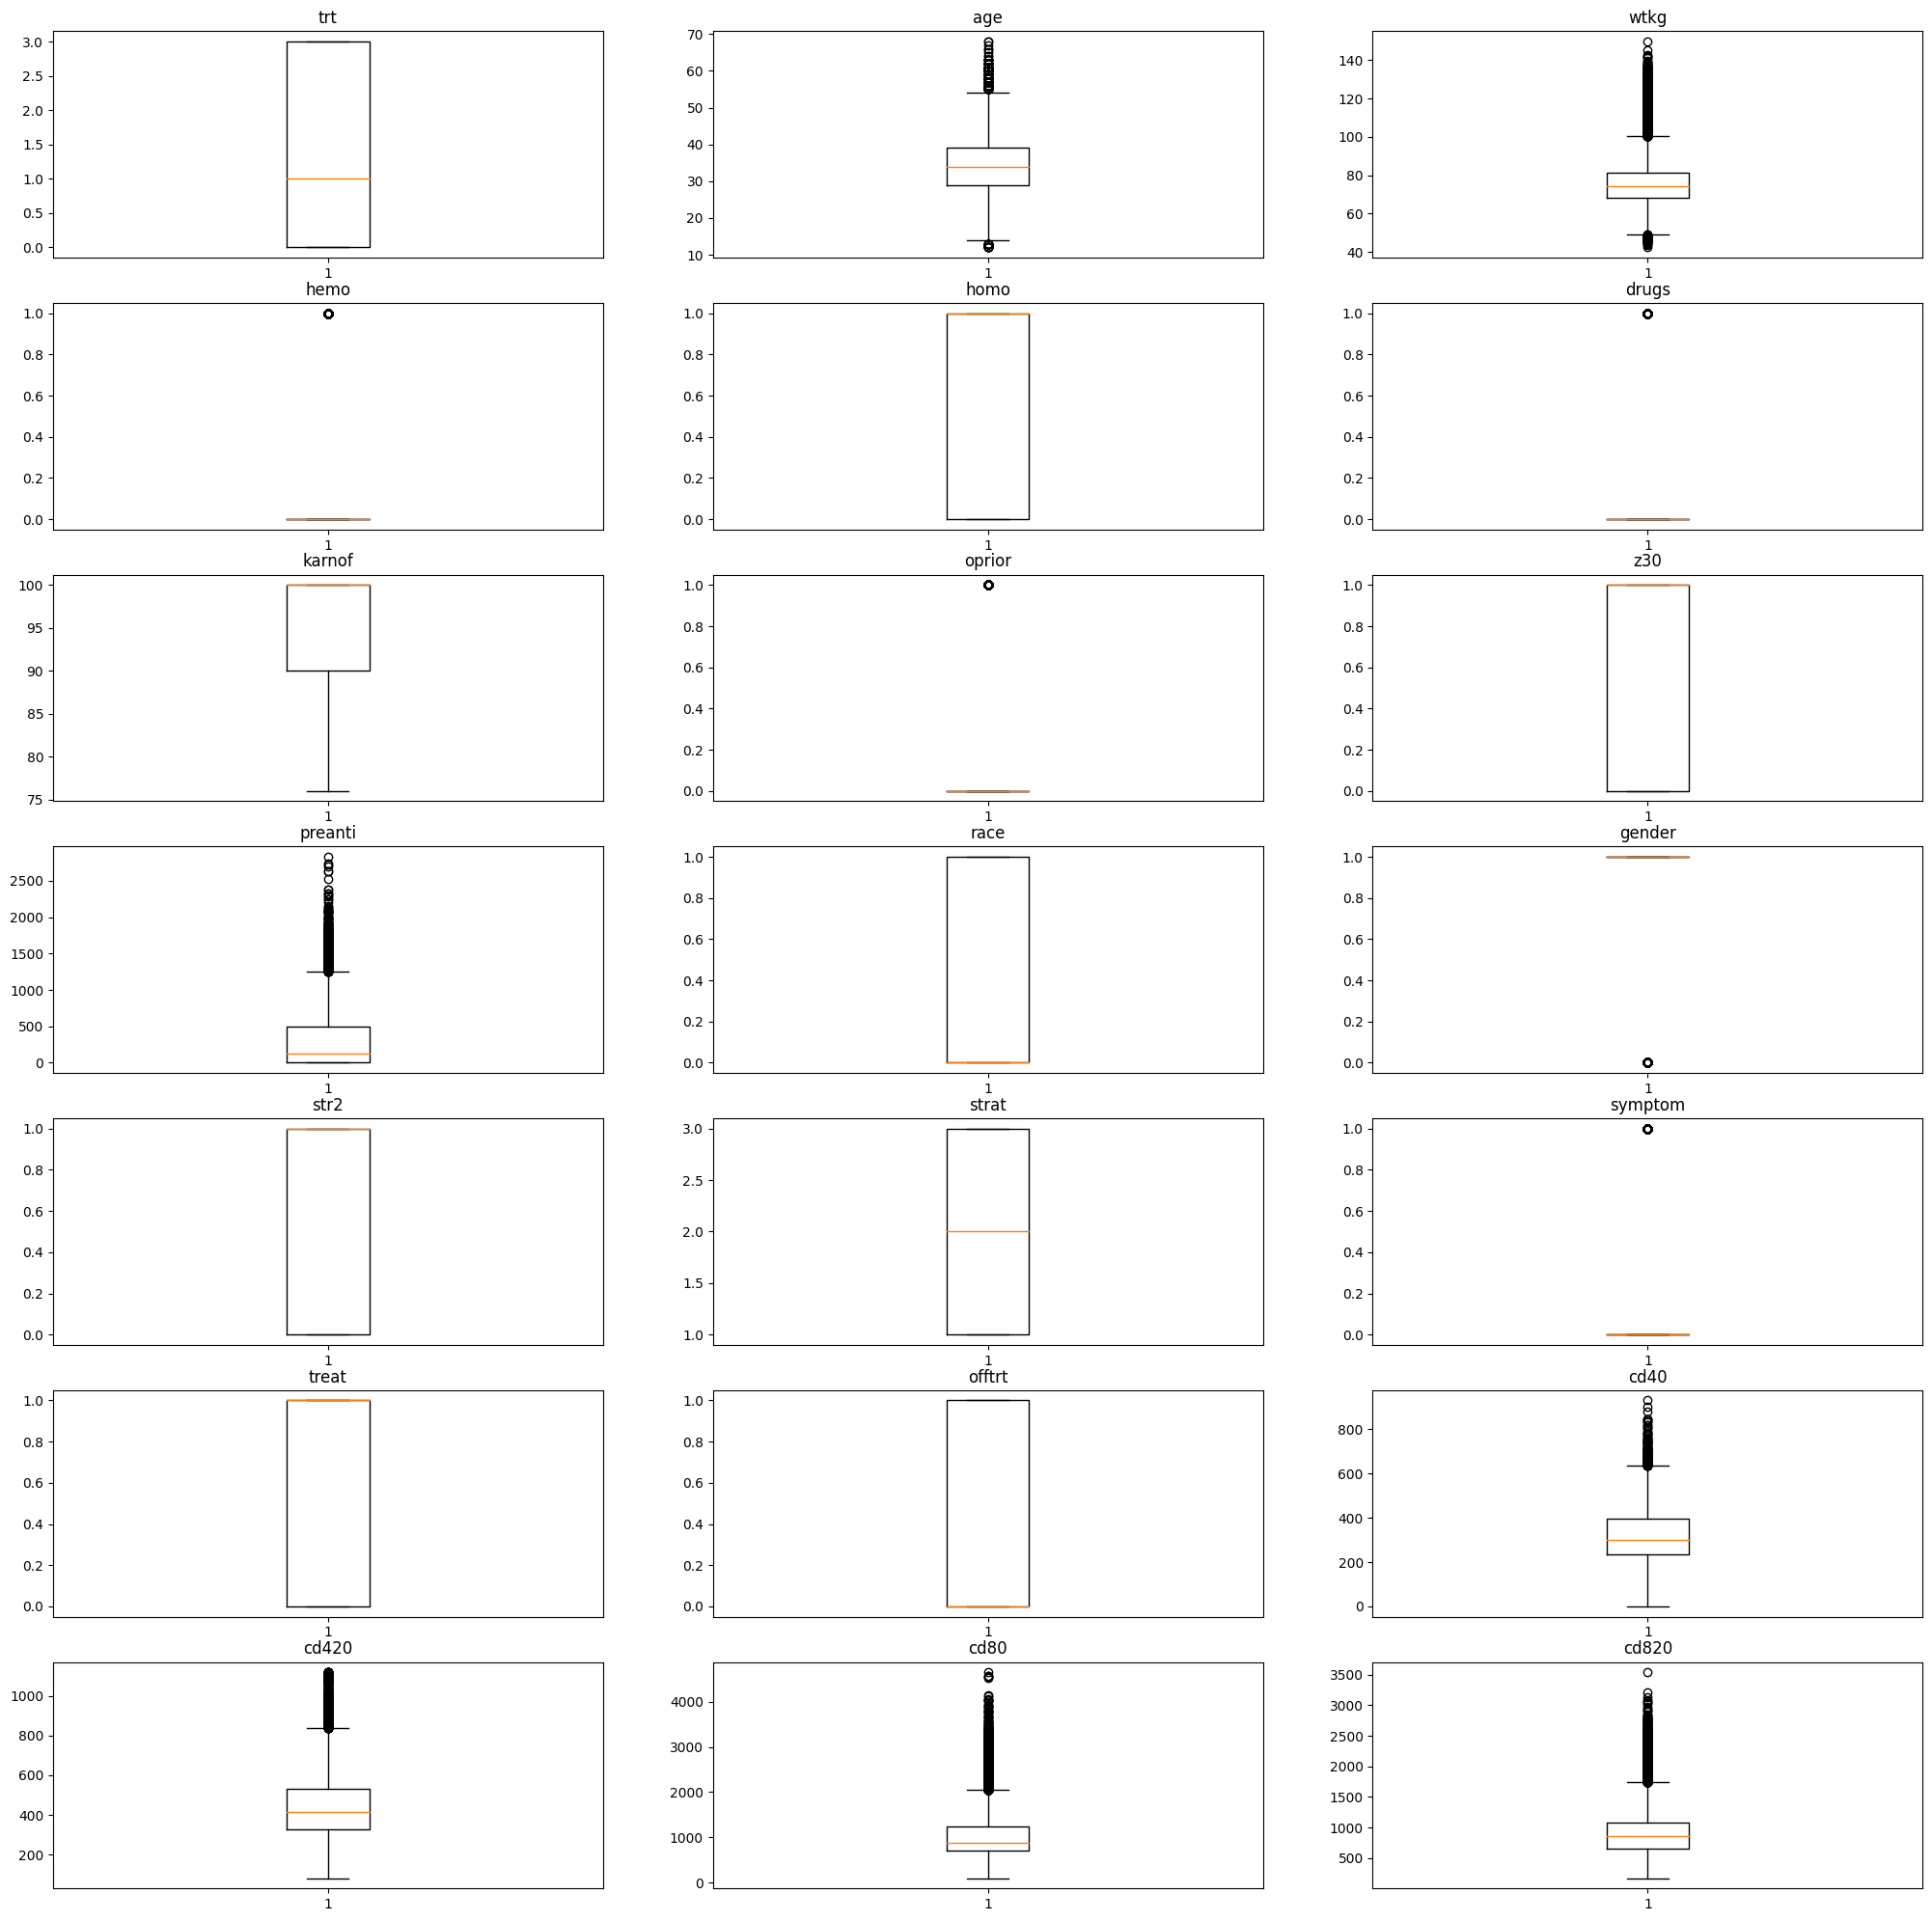

In [4]:
# Data Cleaning

print(df.isna().value_counts())
# there are no missing values

#############################################################

########## Splitting dataset into x('input') and y('target')

x = df.iloc[: , 1:-1]
y = df.iloc[: , -1]

print(x.shape[1])
print(y.shape)

##############################################################

# ########### Plotting BoxPlots for checking the existence of outliers in each and every feature(except target feature)...
plt.figure(figsize = (25 , 25))
for i in range(0 , x.shape[1]):
  plt.subplot(7 , 3 , i+1)
  plt.boxplot(x.iloc[: , i])
  plt.title(x.columns[i])
plt.show()


In [5]:
# we can observe that there are outliers in some features (preanti , cd40 , cd420 , cd80 , cd820)
######### Capping outliers to lower and upper bounds

def normalizing_outliers(data):
  q1 = np.percentile(data , 25)
  q3 = np.percentile(data , 75)

  iqr = q3 - q1

  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)

  data = np.where(data > upper_bound, upper_bound, data)
  data = np.where(data < lower_bound, lower_bound, data)

  return data
for i in ['preanti' , 'cd40' , 'cd420' , 'cd80' , 'cd820']:
  x[i] = normalizing_outliers(x[i])

x

,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,...,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820
0,1,37,79.46339,0,1,0,100,0,1,18.0,...,1,1,2,0,1,0,322.0,469.0,882.0,754.0
1,0,33,73.02314,0,1,0,90,0,1,224.0,...,1,1,3,1,1,1,168.0,575.0,1035.0,1525.0
2,1,43,69.47793,0,1,0,100,0,1,0.0,...,0,1,1,0,0,0,377.0,333.0,1147.0,1088.0
3,3,42,89.15934,0,1,0,100,1,1,513.0,...,1,1,3,0,0,0,238.0,324.0,775.0,1019.0
4,0,37,137.46581,0,1,0,100,0,0,4.0,...,1,0,3,0,0,1,500.0,443.0,1601.0,849.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3,46,61.28204,0,0,0,90,0,1,1089.0,...,0,1,3,0,1,1,234.0,402.0,481.0,1014.0
49996,0,42,73.36768,0,1,0,100,0,1,312.0,...,1,1,3,0,0,1,369.0,575.0,514.0,657.0
49997,0,40,78.75824,0,1,0,100,0,1,0.0,...,1,1,1,0,1,0,308.0,663.0,1581.0,863.0
49998,0,31,52.20371,0,0,0,100,0,1,0.0,...,0,1,1,0,1,1,349.0,440.0,470.0,865.0


In [6]:
#############  Now Segment the data for training and testing

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2)

print(y_test.shape)

(10000,)


In [7]:
##### Normalizing the input features

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scaled_x_train = scale.fit_transform(x_train)
scaled_x_test = scale.transform(x_test)

In [8]:
############## FEATURE EXTRACTION USING PRINCIPLE COMPONENT ANALYSIS

from sklearn.decomposition import PCA

pca = PCA(n_components = 7)
pca_x_train = pca.fit_transform(scaled_x_train)
pca_x_test = pca.transform(scaled_x_test)
pca_x_train

array([[ 2.62445902e+00,  5.17994310e-01, -3.16505895e-02, ...,
        -5.21383440e-01,  1.82210464e-01, -1.11970806e+00],
       [ 2.18163311e+00, -1.30793385e+00,  2.53804251e-01, ...,
        -1.25005841e-01,  1.77851099e-03, -4.67729553e-02],
       [-2.91553303e+00,  2.91794574e+00, -3.39799841e-01, ...,
         1.14182126e+00,  1.02941159e+00,  9.25797988e-01],
       ...,
       [-1.07760302e+00,  1.73453150e+00, -1.59753573e+00, ...,
         8.05372815e-02,  2.05576501e-01, -6.27087055e-01],
       [ 1.41657451e+00,  5.05446353e-01,  1.69580609e+00, ...,
         8.57581066e-01, -2.25040772e-01, -2.48228681e-01],
       [ 1.00442130e+00,  2.58168809e+00, -1.08224380e+00, ...,
        -3.65871812e-01, -6.40219336e-01,  5.52524852e-02]])

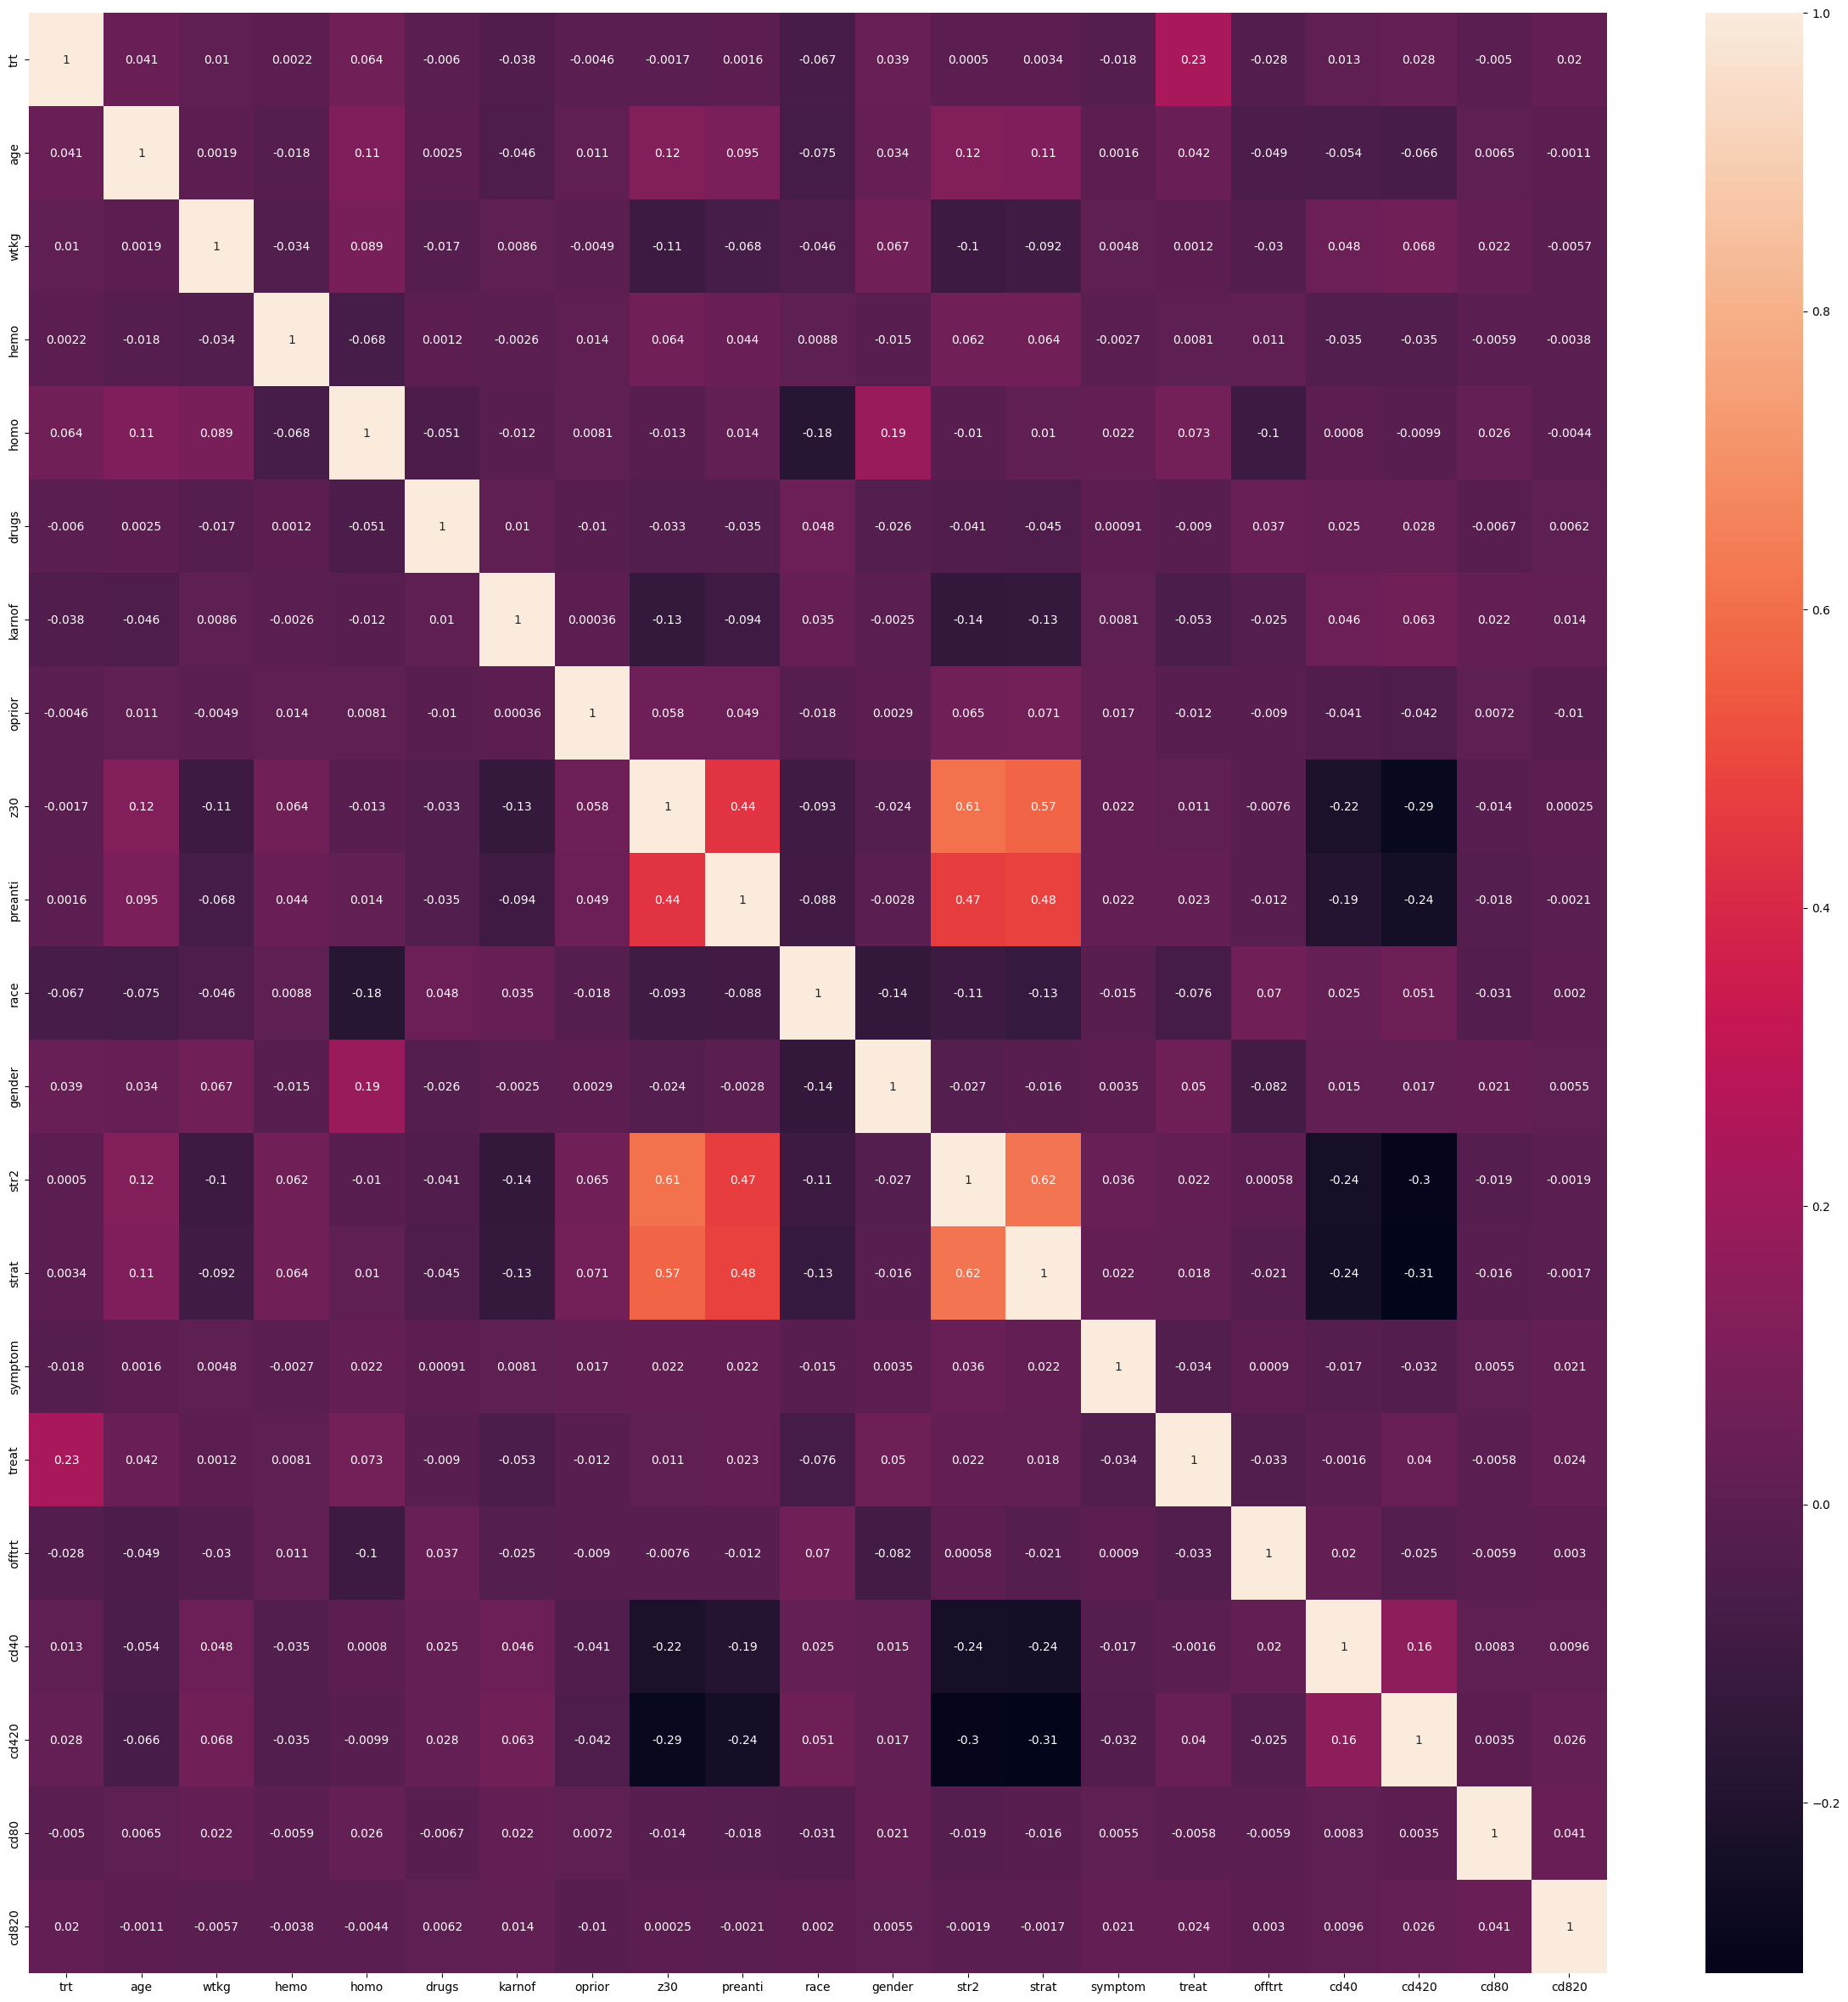

In [9]:
############# Finding the Correlation between the Features

correlation_matrix = x.corr()

plt.figure(figsize = (30, 30))
sns.heatmap(correlation_matrix , annot = True)
plt.show()

In [10]:
'''Removing highly correlated features from a dataset can help improve the performance of machine learning models by reducing multicollinearity and overfitting.'''

threshold = 0.6

# Find index of feature columns with correlation greater than the threshold
high_corr_var = np.where(np.abs(correlation_matrix) > threshold)
print(high_corr_var)
high_corr_var = [(correlation_matrix.index[x], correlation_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]

print("Highly Correlated Features (correlation > 0.5 or < -0.5):")
print(high_corr_var)

to_drop = set()

for feature1, feature2 in high_corr_var:
    to_drop.add(feature2)

# Drop the columns
x_reduced = x.drop(columns=to_drop)

print("Reduced Data Shape:", x_reduced.shape)

# Splitting the reduced dataset into train and test
x_reduced_train , x_reduced_test , y_reduced_train , y_reduced_test = train_test_split(x_reduced , y , test_size = 0.2)

# Normalizing the data
scaled_x_reduced_train = scale.fit_transform(x_reduced_train)
scaled_x_reduced_test = scale.transform(x_reduced_test)

scaled_x_reduced_train[0]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  8,  9, 10, 11, 12, 12, 12, 13,
       13, 14, 15, 16, 17, 18, 19, 20]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 12,  9, 10, 11,  8, 12, 13, 12,
       13, 14, 15, 16, 17, 18, 19, 20]))
Highly Correlated Features (correlation > 0.5 or < -0.5):
[('z30', 'str2'), ('str2', 'strat')]
Reduced Data Shape: (50000, 19)


array([ 0.49204691, -1.00861722,  0.38373384, -0.18603125,  0.726757  ,
       -0.39200595, -1.33636278,  4.75382163,  0.74760097, -0.37371083,
       -0.64306101,  0.40915281, -0.30380798,  0.60106992, -0.71942048,
       -0.45872049,  0.07889092, -1.14613801,  0.3562194 ])

In [11]:
# Model Selection

'''  this is classification supervised problem  '''

##### Classification Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

##### Accuracy_Metric

from sklearn.metrics import accuracy_score , confusion_matrix


models = [LogisticRegression() , DecisionTreeClassifier() , RandomForestClassifier(n_estimators = 100 , ) , SVC(C = 1 , gamma = 0.1 , kernel = 'rbf') , KNeighborsClassifier() , GaussianNB()]
model_names = ["LogisticRegression" , "DecisionTree" , "RandomForest" , "SVC" , "KNearestNeighbors" , "GassianNB"]

accuracy_list = []
confusion_matrix_list = []

##### Model's Training

for model , model_name in zip(models , model_names):
  model.fit(scaled_x_train , y_train)
  y_pred = model.predict(scaled_x_test)
  acc = accuracy_score(y_test , y_pred)
  print(f"{model_name} ----> accuracy({acc})")
  accuracy_list.append(acc)
  confusion_matrix_list.append({model_name : confusion_matrix(y_test , y_pred)})

print(accuracy_list)


LogisticRegression ----> accuracy(0.6983)
DecisionTree ----> accuracy(0.6069)
RandomForest ----> accuracy(0.6997)
SVC ----> accuracy(0.6921)
KNearestNeighbors ----> accuracy(0.6524)
GassianNB ----> accuracy(0.657)
[0.6983, 0.6069, 0.6997, 0.6921, 0.6524, 0.657]


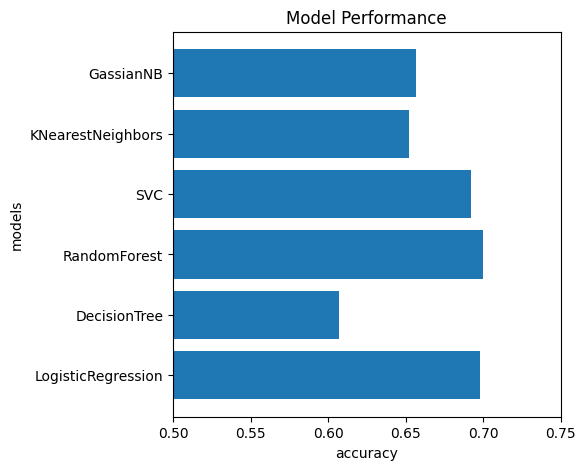

In [23]:
##### Model's Accuracy Graph

plt.figure(figsize = (5 ,5))
plt.barh(model_names , accuracy_list)
plt.title("Model Performance")
plt.ylabel('models')
plt.xlabel('accuracy')
plt.xlim(0.5 , 0.75)
plt.show()

In [33]:
print(y_test.value_counts())
confusion_matrix_list

infected
0    6850
1    3150
Name: count, dtype: int64


[{'LogisticRegression': array([[6364,  486],
         [2531,  619]])},
 {'DecisionTree': array([[4802, 2048],
         [1883, 1267]])},
 {'RandomForest': array([[6294,  556],
         [2447,  703]])},
 {'SVC': array([[6345,  505],
         [2574,  576]])},
 {'KNearestNeighbors': array([[5547, 1303],
         [2173,  977]])},
 {'GassianNB': array([[4760, 2090],
         [1340, 1810]])}]

In [38]:
''' clearly we can see that , here RandomForest Algorithm is working better than others '''

''' Model Evaluation '''

model = RandomForestClassifier(n_estimators = 100 , max_depth = 50 , min_samples_split = 10 , min_samples_leaf = 10)
model.fit(scaled_x_train , y_train)
y_pred = model.predict(scaled_x_test)
acc = accuracy_score(y_test , y_pred)
cm = confusion_matrix(y_test , y_pred)
print(cm)
print(acc)

[[6384  466]
 [2475  675]]
0.7059


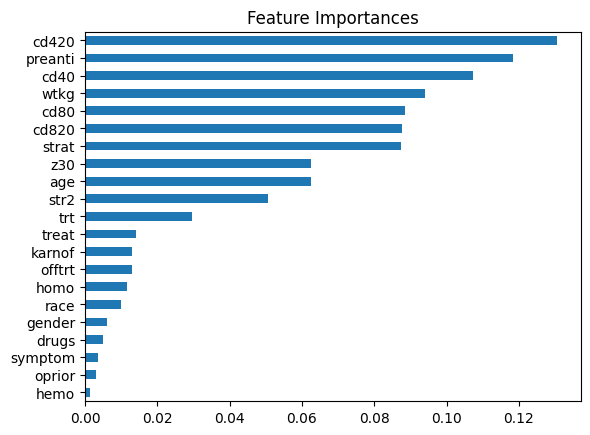

In [40]:
# Get feature importances
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=x.columns)

# Plot feature importances
feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importances')
plt.show()